Ben Christensen

October 3, 2018

# SIR Model

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_bvp

## Problem 1

In [3]:
def sir(y,t):
    """Compute right hand side of SIR model based on population at given time.
    
    Parameters:
    y ((3, ) ndarray): A vector representing S, I, and R populations at t
    t (float): Current time
    
    Returns:
        (tuple): A tuple corresponding to the right hand side of the 
            SIR model
    """
    return (-Beta*y[1]*y[0], Beta*y[1]*y[0] - gamma*y[1], gamma*y[1])


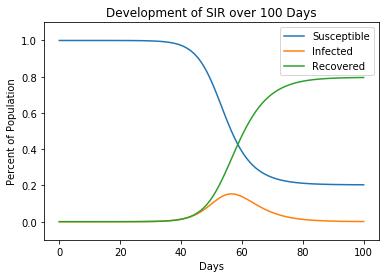

In [4]:
time = np.linspace(0,100,100)
#Solve the ODE with solver
Beta, gamma = .5, .25
sol = odeint(sir, [1-6.25*10**-7, 6.25*10**-7, 0], time)
#Plot and prettify the plot
plt.plot(time, sol[:,0], label="Susceptible")
plt.plot(time, sol[:,1], label="Infected")
plt.plot(time, sol[:,2], label="Recovered")
plt.xlabel("Days")
plt.ylabel("Percent of Population")
plt.ylim(-.1,1.1)
plt.legend(loc="upper right")
plt.title("Development of SIR over 100 Days")
plt.show()


## Problem 2

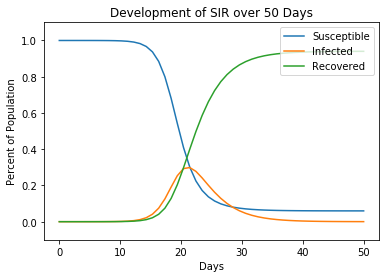

In [5]:
#Solve for different parameters
Beta, gamma = 1, 1/3
time = np.linspace(0, 50, 50)
sol = odeint(sir, [(3000000 - 5)/3000000, 5/3000000, 0], time)
#Plot and prettify the plot
plt.plot(time, sol[:,0], label="Susceptible")
plt.plot(time, sol[:,1], label="Infected")
plt.plot(time, sol[:,2], label="Recovered")
plt.xlabel("Days")
plt.ylabel("Percent of Population")
plt.ylim(-.1,1.1)
plt.legend(loc="upper right")
plt.title("Development of SIR over 50 Days")
plt.show()



In [6]:
#Find max number of infected:
max_infected = np.max(sol[:,1])
print("Number able to work:")
print(str((1 - max_infected) * 3000000))

Number able to work:
2103405.86007


## Problem 3

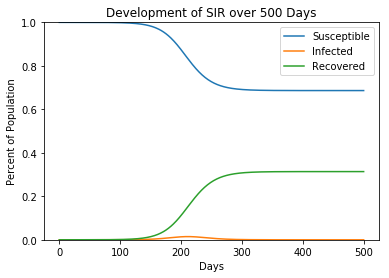

In [7]:
#Solve for different parameters
Beta, gamma = .3, .25
time = np.linspace(0, 500, 500)
sol = odeint(sir, [(3000000 - 5)/3000000, 5/3000000, 0], time)
#Plot and prettify the plot
plt.plot(time, sol[:,0], label="Susceptible")
plt.plot(time, sol[:,1], label="Infected")
plt.plot(time, sol[:,2], label="Recovered")
plt.xlabel("Days")
plt.ylabel("Percent of Population")
plt.ylim(0,1)
plt.legend(loc="upper right")
plt.title("Development of SIR over 500 Days")
plt.show()

## Problem 4

In [8]:
def sirs(y,t):
    """Compute right hand side of SIRS model based on population at given time.
    
    Parameters:
    y ((3, ) ndarray): A vector representing S, I, and R populations at t
    t (float): Current time
    
    Returns:
        (tuple): A tuple corresponding to the right hand side of the 
            SIRS model
    """
    S, I, R = y
    return (f*R + mu*(1-S) - Beta*I*S, Beta*I*S - (gamma + mu)*I, -f*R + gamma*I - mu*R)



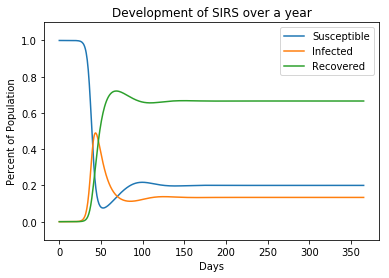

In [9]:
#Solve the SIRS model
Beta, gamma, f, mu = .5, .1, .02, .0001
time = np.linspace(0, 365, 600)
num_infected = 1000
total_pop = 7000000000
sol = odeint(sirs, [(total_pop - num_infected)/total_pop, num_infected/total_pop, 0], time)
#Plot and prettify the plot
plt.plot(time, sol[:,0], label="Susceptible")
plt.plot(time, sol[:,1], label="Infected")
plt.plot(time, sol[:,2], label="Recovered")
plt.xlabel("Days")
plt.ylabel("Percent of Population")
plt.ylim(-.1,1.1)
plt.legend(loc="upper right")
plt.title("Development of SIRS over a year")
plt.show()

## Problem 5

In [10]:
#Define the ODE
def ode(t,y):
    S, E, I = y[:3]
    C = np.zeros(len(t))
    
    return np.array([mu - beta(t)*S*I, beta(t)*S*I - E/lamb, E/lamb - I/ada, C, C, C])
#Define the BCS
def bcs(ya, yb):
    BCa = np.array(ya[0:3] - ya[3:])
    BCb = np.array(yb[0:3] - yb[3:])
    return np.hstack([BCa, BCb])

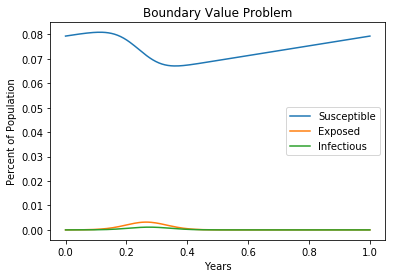

In [11]:
B1, B0, ada, lamb, mu = 1, 1575, .01, .0279, .02
beta = lambda t: B0*(1+B1*np.cos(2*np.pi*t))
y0 = [.0745, .001, .001, .0001, .0001, .0001]
X = np.linspace(0, 1, 200)
y = np.array([.0745, .001, .001, .0001, .0001, .0001]).reshape(-1,1)*np.ones((6, len(X)))

solution = solve_bvp(ode, bcs, X, y)
names = ["Susceptible", "Exposed", "Infectious"]
#Plot the solutions
for i,sol in enumerate(solution.sol(X)[:3]):
    plt.plot(X, sol, label=names[i])

#Prettify
plt.title("Boundary Value Problem")    
plt.xlabel("Years")
plt.ylabel("Percent of Population")
plt.legend()
plt.show()